# Test ADC wheel

This notebook demonstrates how to use the various atmospheric dispersion correctors in METIS. Note that the action of an adc is currently restricted to a transmission loss. The implementation of the geometric differential refraction residuals will follow at a later stage.

In [1]:
import scopesim as sim
sim.bug_report()

# Edit this path if you have a custom install directory, otherwise comment it out.
sim.link_irdb("../../../../") 

Python:
3.10.18 (main, Jun  5 2025, 13:08:10) [GCC 11.2.0]

Installed Python packages:
           anisocado: 0.3.0
         astar-utils: 0.3.3
             astropy: 6.1.7
      beautifulsoup4: 4.13.4
            docutils: 0.19
               httpx: 0.28.1
                lxml: 5.4.0
          matplotlib: 3.10.5
      more-itertools: 10.7.0
               numpy: 1.26.4
           packaging: 25.0
               pooch: 1.8.2
              pyyaml: 6.0.2
               scipy: 1.15.3
            scopesim: 0.10.0
       scopesim_data: could not be loaded.
  scopesim_templates: could not be loaded.
         skycalc-ipy: 0.5.3
             synphot: 1.6.0
                tqdm: 4.67.1

Installed IRDB packages:
  Armazones: 2023-07-11
        ELT: 2025-06-30
      METIS: 2025-06-30

Operating System info:
   System: Linux
  Release: 6.12.13-200.fc41.aarch64
  Version: #1 SMP PREEMPT_DYNAMIC Sat Feb  8 20:30:50 UTC 2025
  Machine: aarch64


In [2]:
import numpy as np

If you haven't got the instrument packages yet, uncomment the following cell

In [ ]:
# sim.download_packages(["METIS", "ELT", "Armazones"]) 

In [3]:
cmd = sim.UserCommands(use_instrument="METIS", set_modes=['img_lm'])

The ADC to use is defined by `"!OBS.adc"`. This can be set to `false` when no ADC is in the path. The default for LM band imaging is

In [4]:
cmd["!OBS.adc"]

'const_90'

In [5]:
metis = sim.OpticalTrain(cmd)

The effect `metis['adc_wheel']` works the same way as e.g. `metis['filter_wheel']`. The following ADCs are now available (yes, there's only one) and can be selected with `metis['adc_wheel'].change_adc()` as demonstrated below.

In [6]:
metis['adc_wheel'].get_table()

name,max_transmission
str8,float64
const_90,0.9


Run a simulation with the ADC in the path (`observe()` without a source observe empty sky):

In [7]:
metis.observe()
implane_adc = metis.image_planes[0].data

astar.scopesim.optics.optical_train - Observing empty field


Now remove the ADC from the path by changing to `False`. Run the simulation without the ADC:

In [8]:
metis['adc_wheel'].change_adc(False)

In [9]:
metis.observe()
implane_no_adc = metis.image_planes[0].data

astar.scopesim.optics.optical_train - Observing empty field


Compare the image plane simulated with and without the ADC. The ratio should be equal to the throughput of the ADC (90 per cent):

In [10]:
med_adc = np.median(implane_adc)
med_no_adc = np.median(implane_no_adc)
print("With ADC:    {:.1f}".format(np.median(med_adc)))
print("Without ADC: {:.1f}".format(np.median(med_no_adc)))
print("Ratio:       {:.1f}".format(med_adc/med_no_adc))

With ADC:    242637.3
Without ADC: 269597.0
Ratio:       0.9


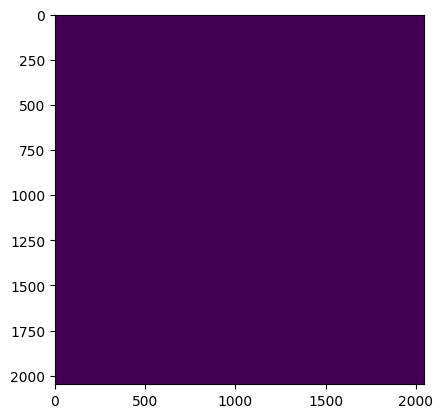

In [12]:
import matplotlib.pyplot as plt
plt.imshow(implane_adc)
plt.show()